Yao et al., 2013

In [1]:
from datetime import datetime
from cdasws import CdasWs
cdas = CdasWs()

TIME_RANGE = [datetime(1995, 2, 4, 13, 50), datetime(1995, 2, 4, 14, 10)]

_, proton_data = cdas.get_data(dataset='WI_PM_3DP', variables=['P_DENS', 'P_VELS', 'P_TEMP'], time0=TIME_RANGE[0], time1=TIME_RANGE[1])
_, mag_data = cdas.get_data(dataset='WI_H0_MFI', variables=['B3GSE'], time0=TIME_RANGE[0], time1=TIME_RANGE[1])

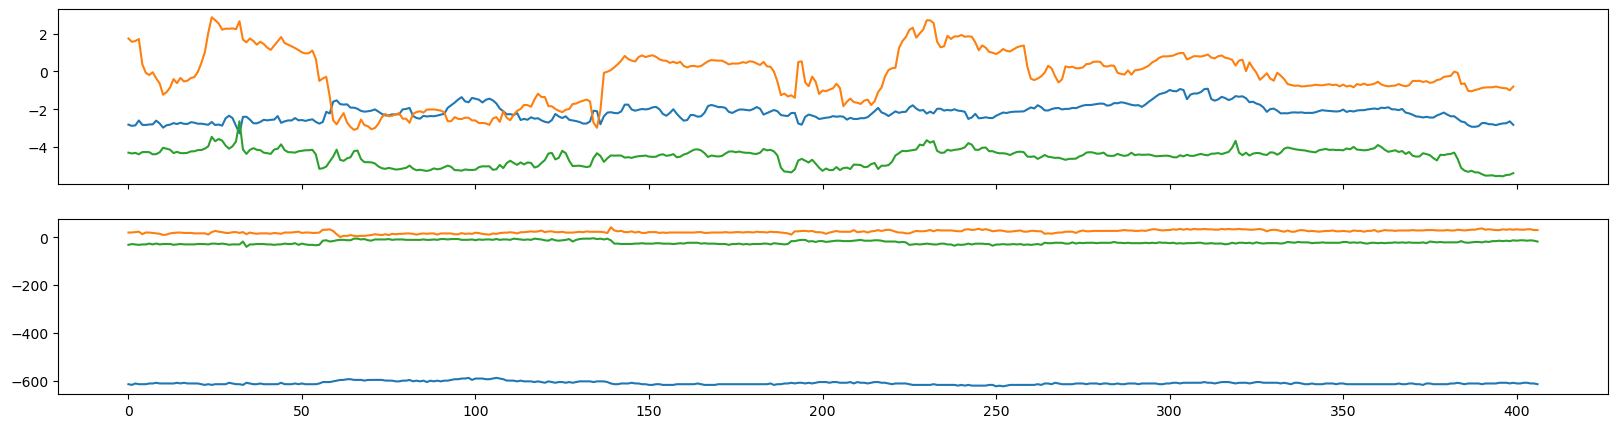

In [7]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 1, figsize = (20, 5), sharex=True)
ax[0].plot(mag_data['B3GSE'])
ax[1].plot(proton_data['P_VELS'])

In [2]:
from astropy import units as u

u.set_enabled_aliases({'sec': u.s, '#': u.dimensionless_unscaled})

from datetime import timedelta
import spcphys_common_functions as scf

alfven_params = scf.alfvenic_parameters.calc_alfven(p_date=scf.preprocess.npdt64_to_dt(proton_data['Epoch'].values), 
                                                    v=proton_data['P_VELS'].values * u.Unit(proton_data['P_VELS'].units), 
                                                    n=proton_data['P_DENS'].values * u.cm**-3, 
                                                    b_date=scf.preprocess.npdt64_to_dt(mag_data['Epoch3'].values), 
                                                    b=mag_data['B3GSE'].values * u.nT, 
                                                    window_size=timedelta(seconds=90), 
                                                    step=timedelta(seconds=3), 
                                                    start_time=TIME_RANGE[0])


(0.0, 1.0)

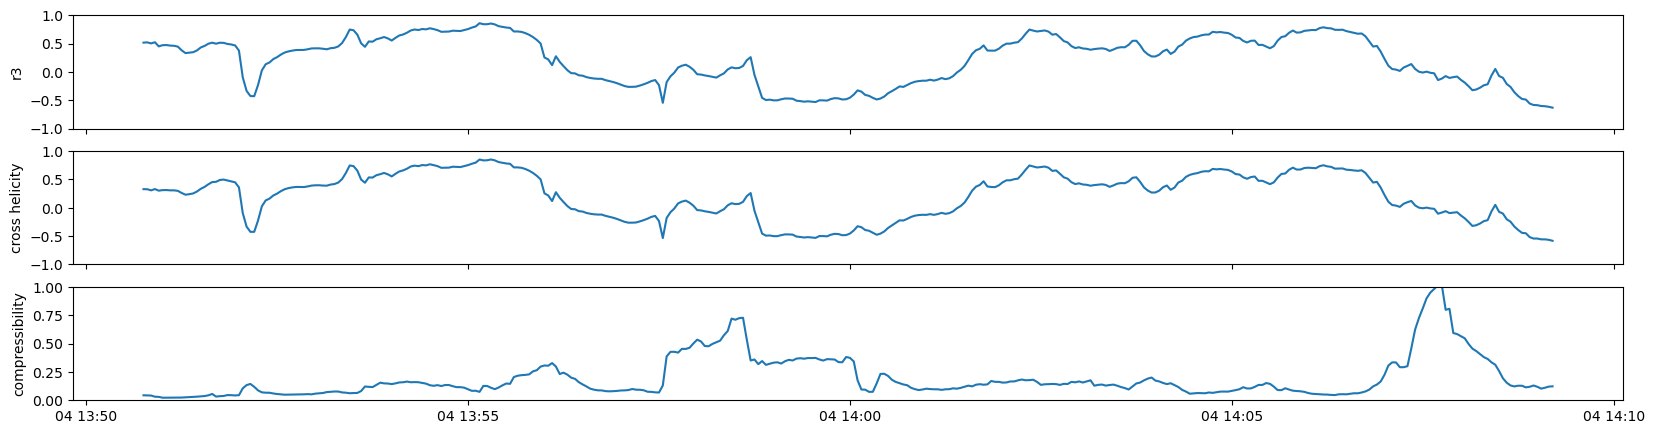

In [3]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 1, figsize = (20, 5), sharex=True)

ax[0].plot(alfven_params['time'], alfven_params['r3'])
ax[0].set_ylabel('r3')
ax[0].set_ylim(-1, 1)
ax[1].plot(alfven_params['time'], alfven_params['cross_helicity'])
ax[1].set_ylabel('cross helicity')
ax[1].set_ylim(-1, 1)
ax[2].plot(alfven_params['time'], alfven_params['compressibility'])
ax[2].set_ylabel('compressibility')
ax[2].set_ylim(0, 1)

微妙的区别可能在于插值的方法？此处插值为先计算dva后从插值到质子时间点

In [ ]:
import spcphys_common_functions as scf
from astropy import units as u

beta = scf.plasma_beta.calc_beta(p_date=scf.preprocess.npdt64_to_dt(proton_data['Epoch'].values),
                                    n=proton_data['P_DENS'].values * u.cm**-3,
                                    b_date=scf.preprocess.npdt64_to_dt(mag_data['Epoch3'].values),
                                    b=mag_data['B3GSE'].values * u.nT,
                                    T=scf.vth_E_T.E_to_T(proton_data['P_TEMP'].values * u.eV))

Text(0, 0.5, 'beta')

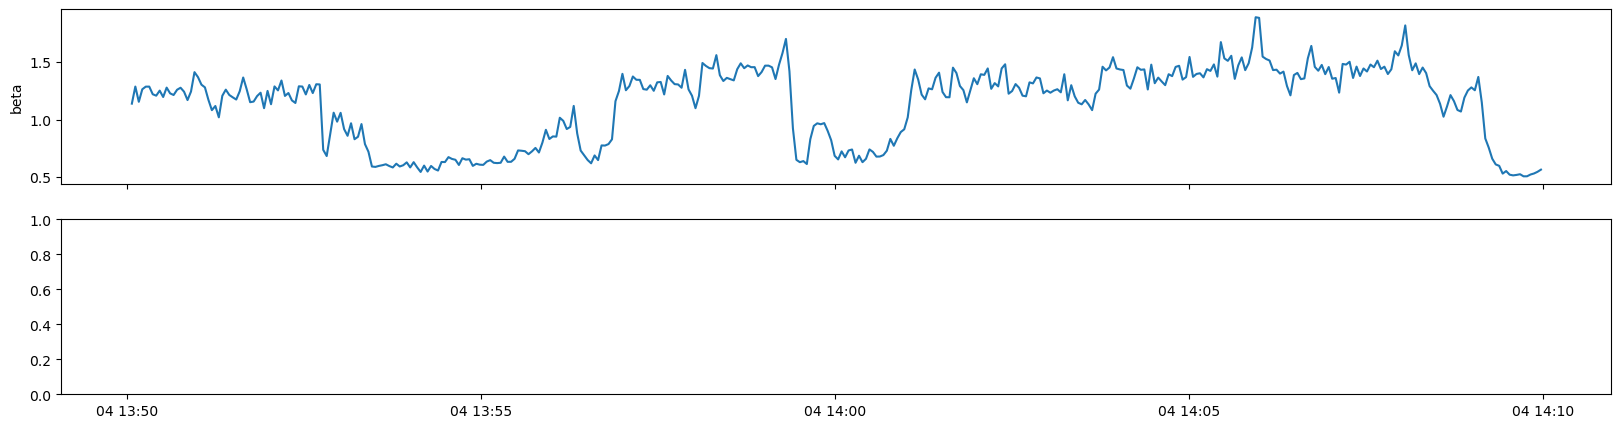

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (20, 5), sharex=True)

ax[0].plot(scf.preprocess.npdt64_to_dt(proton_data['Epoch'].values), beta)
ax[0].set_ylabel('beta')
